In [160]:
#ANLY590
#Assignment0
#09/20/2018
#Jiawei Yu

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 17 columns):
AtBat      263 non-null int64
Hits       263 non-null int64
HmRun      263 non-null int64
Runs       263 non-null int64
RBI        263 non-null int64
Walks      263 non-null int64
Years      263 non-null int64
CAtBat     263 non-null int64
CHits      263 non-null int64
CHmRun     263 non-null int64
CRuns      263 non-null int64
CRBI       263 non-null int64
CWalks     263 non-null int64
PutOuts    263 non-null int64
Assists    263 non-null int64
Errors     263 non-null int64
Salary     263 non-null float64
dtypes: float64(1), int64(16)
memory usage: 37.0 KB


Text(0,0.5,'weights')

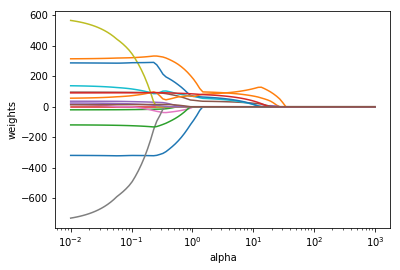

In [161]:
#1.1
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

hitters = pd.read_csv('~/Desktop/Hitters.csv')
hitters = hitters.drop(hitters.columns[[0, 14, 15,20]], axis=1)
hitters = hitters.dropna()
hitters.info()

y = hitters.Salary
x = hitters.drop(hitters.columns[[16]], axis=1)
#x.info()

alphas = 10**np.linspace(3,-2,100)*0.5
#alphas

x_train, x_test , y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

lasso = Lasso(max_iter = 10000, normalize = True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(x_train), y_train)
    coefs.append(lasso.coef_)


ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
    

In [162]:
#1.1.2
coefs

[array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0., -0.,  0.]),
 array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0., -0.,  0.]),
 array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0., -0.,  0.]),
 array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0., -0.,  0.]),
 array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0., -0.,  0.]),
 array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0., -0.,  0.]),
 array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0., -0.,  0.]),
 array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0., -0.,  0.]),
 array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0., -0.,  0.]),
 array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0., -0.,  0.]),
 array([ 0.,  0.,  0

In [163]:
#According to the coefs matrix, the final three predictors are Hits, 
#RBI, and CRBI

In [164]:
#1.1.3
lassocv = LassoCV(alphas = alphas, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(x_train, y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(x_train, y_train)
print("The mean squared error is: "+ str(mean_squared_error(y_test, lasso.predict(x_test))))
print("The optomal value of the regularization penalty is "+ str(lassocv.alpha_))

The mean squared error is: 133755.015434
The optomal value of the regularization penalty is 0.051176551095


In [165]:
#1.1.4
pd.Series(lasso.coef_, index=x.columns)

AtBat     -2.216583
Hits       7.269218
HmRun     -2.226806
Runs      -0.000000
RBI        1.327154
Walks      4.179464
Years     -0.131756
CAtBat    -0.211549
CHits      0.521344
CHmRun     1.405709
CRuns      0.856314
CRBI       0.220493
CWalks    -0.461707
PutOuts    0.320598
Assists    0.132663
Errors     2.161614
dtype: float64

In [166]:
#According to the result, there are 15 predictors are left in the model.

Text(0,0.5,'weights')

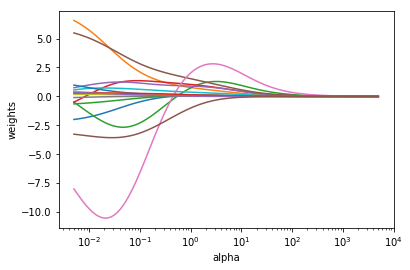

In [167]:
#1.2.1
alphas = 10**np.linspace(4,-2,100)*0.5
#alphas

x_train, x_test , y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=1)
ridge = Ridge(normalize = True)
coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(x, y)
    coefs.append(ridge.coef_)
    
np.shape(coefs)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [172]:
#1.2.2
ridgecv = RidgeCV(alphas = alphas, cv = 10,scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(x_train, y_train)
print("The optomal value of the regularization penalty is "+ str(ridgecv.alpha_))

ridge = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge.fit(x_train, y_train)
print("The mean squared error is: "+ str(mean_squared_error(y_test, ridge.predict(x_test))))
pd.Series(ridge.coef_, index=x.columns)
#ridge.fit(x, y)

The optomal value of the regularization penalty is 0.574878497699
The mean squared error is: 104628.728332


AtBat     -0.033776
Hits       0.828731
HmRun     -0.227147
Runs       0.696582
RBI        1.463143
Walks      2.001124
Years      0.686783
CAtBat     0.006619
CHits      0.051711
CHmRun     0.505347
CRuns      0.107236
CRBI       0.126384
CWalks     0.101977
PutOuts    0.297540
Assists    0.010178
Errors     0.220376
dtype: float64

In [169]:
#2.1
#When we build the prediction model, if we use a lot of data and complex 
#Algorithm(more features) to train our model, we may get very good 
#result on training data but it may have very bad result on other 
#dataset(test data). This situation we call it has high bias and low 
#variance(Overfitting). If we simplfy the algorithm (less features)or decrease 
#the number of observations in training data, it might have better 
#performance on test data. And we define that the model has high 
#variance and low bias(underfitting). It shows that there is a tradeoff 
#between bias and variance, so we need to find the best point which 
#maintain the bias and variance are both low for getting the best 
#prediction performance

In [170]:
#2.2
#When we have more features(parameters) and less observations, the model 
#will be overfitting. In this situation, we use regularization to deal
#with the overfitting problem. The regularization will keep all features
#but reduce magnitude or values of the parameters. It will let each feature
#contribute a bit to predict y variable.

In [171]:
#2.3
#In the number(1), we build a lasso model for train data. I split the dataset
#into 80% training and 20% test. According to the coefficient trajectories
#plot, we can get the important variables and give them weights when we
#build the model. If we use the simple linear regression model to trian
#the data, it might overfitting(which has high bias and low variance). And
#using the cross-validation find the optimal value of the regularization
#penalty for the lasso model, and it elimates the predictiors from 16 to 6
#(the other predictiors set to 0). And this set the optimal value for both
#bias and variance which means have the lowest mean square error and best
#prediction result.